- Notebook with the code for Figures 3 and 4 in the manuscript

Rekha Varrier, 2021-22

In [1]:
# import general packages, check folders
#%reset
import os
import numpy as np
import h5py
import pandas as pd
#import imagesc as imagesc #pip install imagesc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
from pathlib import Path

# TO DO - REMOVE THE UNNECESSARY LIBRARY IMPORTS

%matplotlib inline

working_dir = '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code'
print('current directory:\n',working_dir)
path = Path(working_dir)
parent_folder = path.parent
data_file_loc = os.path.join(parent_folder,'data') # to store data we extract later in this notebook

current directory:
 /Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code


In [2]:
# setting default fontsizes for plots
s=16 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend

In [3]:
#suff= ''
suff = '_corrected' # this term doesn't mean much in any of the scripts, this was a term used for my convenience.

In [4]:
# load behavioral data - coded 1 for "social", 0 for "nonsocial" and 9 for "unsure", nan for missed response
responses = np.load(os.path.join(data_file_loc,f'responses{suff}.npy'))
responses.shape # nsubs * movies

(1049, 10)

In [5]:
vidnames = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", "Random mechanical","Scaring", "SEDUCING-B", "STAR-A", "SURPRISING-B", "TENNIS-A"]
vidnames

['COAXING-B',
 'BILLIARD-A',
 'DRIFTING-A',
 'Fishing',
 'Random mechanical',
 'Scaring',
 'SEDUCING-B',
 'STAR-A',
 'SURPRISING-B',
 'TENNIS-A']

In [8]:
# load reg coeffts
coef_slope_rand = np.load(os.path.join(data_file_loc,'coefs_run_norm','slope_reg',f'coef_slopereg_runnorm_Random mechanical{suff}.npy'))
coef_slope_coax = np.load(os.path.join(data_file_loc,'coefs_trial_norm','slope_reg',f'coef_slopereg_trialnorm_COAXING-B{suff}.npy'))
coef_slope_bill = np.load(os.path.join(data_file_loc,'coefs_trial_norm','slope_reg',f'coef_slopereg_trialnorm_BILLIARD-A{suff}.npy'))
coef_slope_all  = np.load(os.path.join(data_file_loc,f'coef_slopereg_all{suff}.npy')) # YET TO BE CHANGED!!
print(coef_slope_rand.shape)
coef_slope_all.shape

(1049, 268)


(1049, 268, 2)

# Statistics

In [9]:
from multipy.fdr import lsu # for multiple comparison correction

# 1. RANDOM MECH

In [10]:
# same movie: rand
movie_ind = 4 # movie index for RANDOM MECH (in the HCP study movie order wasn't randomized)

soc_inds = responses[:,movie_ind]==1 # subs who responded "social"
nonsoc_inds = responses[:,movie_ind]==0 # subs who respoded "nonsocial"

print(f'movie={vidnames[movie_ind]},soc={len(np.where(soc_inds)[0])},nonsocial={len(np.where(nonsoc_inds)[0])}')

# ttest between slope regs yes vs. no
_,pval_slope_rand_unc = stats.ttest_ind(coef_slope_rand[soc_inds,:], coef_slope_rand[nonsoc_inds,:],axis=0, equal_var=False)
meanDiff_sl_rand = np.nanmean(coef_slope_rand[soc_inds,:],axis=0)-np.nanmean(coef_slope_rand[nonsoc_inds,:],axis=0)

#fdr correction
pval_slope_rand_corr = lsu(pval_slope_rand_unc,q=.05)#fdr_correction(pval_slope_rand,.05)
pval_slope_rand_unc = pval_slope_rand_unc<.05 #uncorrected

movie=Random mechanical,soc=107,nonsocial=670


In [12]:
# for reporting number of "Social" and "Non-social" responses in the Methods section of paper 
len(np.where(responses[:,4]==1)[0]), len(np.where(responses[:,4]==0)[0]), len(np.where(responses[:,4]==9)[0]) 

(107, 670, 225)

In [13]:
(107+225)/(670+107+225) # fraction of the non-dominant ("Social" or 1 and "Unsure" or 9) responses for RANDOM MECH from above

0.3313373253493014

In [14]:
# RGB values for "Social" and "Non-social" (red and blue, resp/)
red_rgb =[188,61,62] 
blue_rgb = [54,122,177] 
red_rgb = np.array(red_rgb)/255
blue_rgb = np.array(blue_rgb)/255
alpha = .2 # transparency inside boxplots, for datapts etc.

107


Text(25, 20, '"Non-social"\nbias')

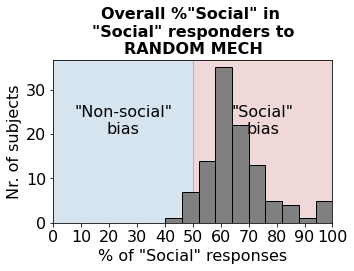

In [28]:
# Are responders to "Social" generally biased to respond "Social"?
# Sanity check analysis. Not in paper.
nr_soc_SocRAND = [len(np.where(i==1)[0])  for i in responses[soc_inds,:]] # nr. of "Social" responses in RAND"Social" responders
nr_soc_NonSocRAND = [len(np.where(i==0)[0])  for i in responses[soc_inds,:]] # nr. of "Non-social" responses in RAND"Social" responders
fr_soc_Soc_pc_ = []
for i in range(len(nr_soc_SocRAND)):
    try:
        fr_soc_Soc_pc_.append(100 * nr_soc_SocRAND[i]/(nr_soc_SocRAND[i]+nr_soc_NonSocRAND[i]))
    except:
        print('NaN')
        #fr_soc_Soc_pc_.append(np.nan)
print(len(nr_soc_SocRAND))
fig = plt.figure(1,figsize=(5,3))
ax = fig.add_subplot(111)
ax.axvspan(50,100,color=red_rgb,alpha=alpha)
ax.axvspan(0,50,color=blue_rgb,alpha=alpha)
ax.hist(fr_soc_Soc_pc_, color='grey',bins=10,edgecolor='k')
#ax.vlines(50,plt.ylim()[0],plt.ylim()[1],color='k')
ax.set_xlabel('% of "Social" responses')
ax.set_ylabel('Nr. of subjects')
ax.set_xticks(np.arange(0,101,10))
plt.xlim(0,100)
ax.set_title('Overall %"Social" in \n"Social" responders to\nRANDOM MECH',fontweight='bold')
ax.text(75,20,'"Social"\nbias', ha='center',  color = 'k')
ax.text(25,20,'"Non-social"\nbias', ha='center', color = 'k')

# 2, COAXING/BILLIARD

In [11]:
# movie 0 was COAXING and movie 1 was BILLIARD (in the second dimension of "responses")
# 1 = "Social", 0 = "Non-social" (how to interpret values in the variable "responses")
len(np.where(responses[:,0]==1)[0]),len(np.where(responses[:,1]==0)[0]), np.where((responses[:,0]==1)&(responses[:,1]==0))[0].shape 

(977, 913, (870,))

## Are COAXING and BILLIARD comparable in ambiguity?

 (reported in the paper in response to reviewer question)

In [12]:
# coax vs bill (movies 0 and 1, resp.)
movie_inds = [0,1]
print([vidnames[i] for i in movie_inds])
subs = (responses[:,movie_inds[0]]==1) & (responses[:,movie_inds[1]]==0) # subjects who respoded "nonsocial" to BILL and "social" to COAX
print(f'Nr. Soc and Nr. nonsoc ={len(np.where(subs)[0])}')

['COAXING-B', 'BILLIARD-A']
Nr. Soc and Nr. nonsoc =870


In [ ]:
# mcnemar test to ensure 
coax_div_all = np.array([len(np.where(responses[:,0]==1)[0]), len(np.where(responses[:,0]==0)[0]), len(np.where(responses[:,0]==9)[0])])
bill_div_all = np.array([len(np.where(responses[:,1]==1)[0]), len(np.where(responses[:,1]==0)[0]), len(np.where(responses[:,1]==9)[0])])
bill_div_all = bill_div_all[[1,0,2]]

coax_div_all, bill_div_all, len(np.where(np.isnan(responses[:,0]))[0]), len(np.where(np.isnan(responses[:,1]))[0])


In [21]:
def return_len(inp):
    return len(np.where(inp)[0])

def run_mcnemar(coax_bill_resp, coax_vals, bill_vals,  comp_type = 's_ns'):
    # source: https://towardsdatascience.com/mcnemars-test-to-evaluate-machine-learning-classifiers-with-python-9f26191e1a6b and 
    # https://gist.github.com/March-08/ba49d2ed1150bc0a135294c0489f4c1c#file-mcnemar_test-py
    # Import library
    from statsmodels.stats.contingency_tables import mcnemar

    subs_tbl = []
    if comp_type == 'dom_nondom':
        subs_tbl.append((coax_bill_resp[:,0]!=coax_vals['dom']) & (coax_bill_resp[:,1]!=bill_vals['dom']))  # nondom - nondom
        subs_tbl.append((coax_bill_resp[:,0]!=coax_vals['dom']) & (coax_bill_resp[:,1]==bill_vals['dom']   ))  # nondom - dom
        subs_tbl.append((coax_bill_resp[:,0]==coax_vals['dom']) & (coax_bill_resp[:,1]!=bill_vals['dom']))  # dom - nondom
        subs_tbl.append((coax_bill_resp[:,0]==coax_vals['dom']) & (coax_bill_resp[:,1]==bill_vals['dom']   ))  # dom - dom
    elif comp_type == 's_ns':
        subs_tbl.append((coax_bill_resp[:,0]==coax_vals['nondom'][0]) & (coax_bill_resp[:,1]==bill_vals['nondom'][0]))  # ns - s
        subs_tbl.append((coax_bill_resp[:,0]==coax_vals['nondom'][0]) & (coax_bill_resp[:,1]==bill_vals['dom']   ))     # ns - ns
        subs_tbl.append((coax_bill_resp[:,0]==coax_vals['dom'])       & (coax_bill_resp[:,1]==bill_vals['nondom'][0]))  # s - s
        subs_tbl.append((coax_bill_resp[:,0]==coax_vals['dom'])       & (coax_bill_resp[:,1]==bill_vals['dom']   ))     # s - ns

    data = [[return_len(subs_tbl[0]), return_len(subs_tbl[1])], [return_len(subs_tbl[2]),return_len(subs_tbl[3])]]
    print(data)

    threshold = 3.841 
    significance_value = 0.05

    # McNemar's Test with the continuity correction
    test = mcnemar(data, exact=False, correction=True) # either exact or correction needed for small samples
    
    if test.pvalue < significance_value:
        print("Reject Null hypotesis")
    else:
        print("Fail to reject Null hypotesis")

    #or equivalently
    if test.statistic > threshold:
        print("Reject Null hypotesis")
    else:
        print("Fail to reject Null hypotesis")

    return data, test

In [23]:
subs_yesno = ~np.isnan(responses[:,0]) & ~np.isnan(responses[:,1]) & (responses[:,0] != 9) & (responses[:,1] != 9)
coax_bill_resp  = responses[subs_yesno,:2]
print(len(np.where(coax_bill_resp[:,0]==0)[0]), len(np.where(coax_bill_resp[:,0]==1)[0]), len(np.where(coax_bill_resp[:,1]==1)[0]), len(np.where(coax_bill_resp[:,1]==0)[0]))
coax_vals =  {'dom':1, 'nondom': [0]}
bill_vals =  {'dom':0, 'nondom': [1]}

data, results = run_mcnemar(coax_bill_resp, coax_vals, bill_vals)
print(results)

6 886 16 876
[[0, 6], [16, 870]]
Fail to reject Null hypotesis
Fail to reject Null hypotesis
pvalue      0.055008833629265896
statistic   3.6818181818181817


## Neural data analysis for COAX-BILL

In [31]:
_,pval_slope_coaxbill_unc = stats.ttest_rel(coef_slope_coax[subs,:], coef_slope_bill[subs,:],axis=0)
meanDiff_sl_coaxbill = np.nanmean(coef_slope_coax[subs,:]-coef_slope_bill[subs,:],axis=0)
pval_slope_coaxbill_corr = lsu(pval_slope_coaxbill_unc,q=.05) #fdr correction
pval_slope_coaxbill_unc = pval_slope_coaxbill_unc<.05

['COAXING-B', 'BILLIARD-A']
Nr. Soc and Nr. nonsoc =870


# 3. All SOCIAL v. NON-SOCIAL

In [32]:
# to get an estimate for how many subjects gave all 10 responses. 
# In the response data, subjects with <10 responaes have already been assigned an NaN value 
# (so no need to select only good subjects again based on responses 1,0 and 9)
count_resp = np.zeros((responses.shape[0],))
for i in range(responses.shape[0]):
    count_resp[i] = len(np.where(~np.isnan(responses[i,:]))[0])
len(np.where(count_resp == 10)[0])

814

In [33]:
pval_slope_all_unc = np.empty((268,))
meanDiff_sl_all =  np.empty_like(pval_slope_all_unc)
pval_slope_all_unc[:] = np.nan
meanDiff_sl_all[:] = np.nan

# coef_slope_all is different from the other analyses above in that there's one metric per run that summarizes S-NS
# (for more details, check the methods section of the Seeing social manuscript)
for n in range(268): # 268 nodes or brain parcels
    dat = np.mean(coef_slope_all[:,n,:],axis=1)
    dat = dat[~np.isnan(dat)] # nan values are usually incomplete subjects (it's set that way in 2A_1_A_..allmovies.ipynb)
    _,pval_slope_all_unc[n] = stats.ttest_1samp(dat,0,nan_policy='omit')
    meanDiff_sl_all[n] = np.nanmean(dat)
pval_slope_all_corr = lsu(pval_slope_all_unc,q=.05)
pval_slope_all_unc = pval_slope_all_unc < .05

- note that all the mean differences that come out of the GLM analyses (random mech, coax-bill, all movies) have the dimension 268. This is because neural data was initially chunked as per the Shen parcellation, so these 268 regions are ROIs or parcels spread across the brain.

In [35]:
sign_rand = []
sign_coaxbill = []
sign_rand_coaxbill_Soc = []
sign_rand_coaxbill_NonSoc = []

# variables to store whether the beta values or coefficients for the social and nonsocial responders for (1) RANDOM MECH, and
# (2) COAXING-BILLIARD
# are comparable.
for n in range(268):#np.where(nodes_coaxbill_rand_all)[0]:
    if np.sign(np.nanmean(coef_slope_rand[soc_inds,n],axis=0)) == np.sign(np.nanmean(coef_slope_rand[nonsoc_inds,n],axis=0)):
        sign_rand.append(1)
    else:
        sign_rand.append(0)
    if np.sign(np.nanmean(coef_slope_coax[subs,n],axis=0)) == np.sign(np.nanmean(coef_slope_bill[subs,n],axis=0)):
        sign_coaxbill.append(1)
    else:
        sign_coaxbill.append(0)

    if np.sign(np.nanmean(coef_slope_rand[soc_inds,n],axis=0)) == np.sign(np.nanmean(coef_slope_coax[subs,n],axis=0)):
        sign_rand_coaxbill_Soc.append(1)
    else:
        sign_rand_coaxbill_Soc.append(0)
    if np.sign(np.nanmean(coef_slope_rand[nonsoc_inds,n],axis=0)) == np.sign(np.nanmean(coef_slope_bill[subs,n],axis=0)):
        sign_rand_coaxbill_NonSoc.append(1)
    else:
        sign_rand_coaxbill_NonSoc.append(0)

In [22]:
# This variable is referred to in future analysis and the paper as  the intersection nodes/social processing regions
# this variable stores the intersection nodes between nodes showing a significant social > nonsocial for (1) random mech, 
# (2) coax-bill and (3) all movies, and in the same direction (i.e., if "Social" > "Non-social" for random mech, it has to be 
# so also for coax-bill and across all movies)
# these nodes show up as the black contours in Figure 3 and other figures where we mention "social processing regions"

nodes_coaxbill_rand_all = (pval_slope_rand_corr) & (pval_slope_coaxbill_corr)  & (pval_slope_all_corr) & \
(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_coaxbill)) & \
(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_all))

np.where(nodes_coaxbill_rand_all), len(np.where(nodes_coaxbill_rand_all)[0])

((array([  8,   9,  11,  12,  13,  15,  18,  19,  21,  28,  29,  30,  42,
          47,  48,  49,  64,  65,  66,  68,  69,  70,  72,  73,  75,  80,
          89,  99, 101, 103, 104, 106, 107, 110, 111, 112, 113, 115, 116,
         118, 127, 144, 146, 148, 150, 152, 154, 155, 156, 176, 191, 198,
         199, 200, 203, 205, 206, 208, 209, 212, 213, 235, 239, 240, 241,
         245, 246, 251, 252, 255]),),
 70)

In [44]:
# are all these nodes with beta soc >beta nonsoc activations or deactivations? let's check
# exploring whether the brain regions activate or deactivate (i.e., coef social > nonsocial in absolute value or vice versa)

# RANDOM MECH
dirn_abs_rand = np.empty((268,))
for n in range(268):
    #S_NS_sign = np.sign(np.nanmean(coef_slope_rand[soc_inds,n],axis=0)) == np.sign(np.nanmean(coef_slope_rand[nonsoc_inds,n],axis=0))
    absS_gr_absNS = np.abs(np.nanmean(coef_slope_rand[soc_inds,n],axis=0)) > np.abs(np.nanmean(coef_slope_rand[nonsoc_inds,n],axis=0))
    absNS_gr_absS = np.abs(np.nanmean(coef_slope_rand[soc_inds,n],axis=0)) < np.abs(np.nanmean(coef_slope_rand[nonsoc_inds,n],axis=0))
    if  absS_gr_absNS: # & S_NS_sign
        dirn_abs_rand[n] = 1
    elif absNS_gr_absS: # S_NS_sign &
        dirn_abs_rand[n] = -1
    else:
        dirn_abs_rand[n] = 0

# COAXING-BILLIARS
dirn_abs_coaxbill = np.empty((268,))
for n in range(268):
    #S_NS_sign = np.sign(np.nanmean(coef_slope_coax[subs,n],axis=0)) == np.sign(np.nanmean(coef_slope_bill[subs,n],axis=0))
    absS_gr_absNS = np.abs(np.nanmean(coef_slope_coax[subs,n],axis=0)) > np.abs(np.nanmean(coef_slope_bill[subs,n],axis=0))
    absNS_gr_absS = np.abs(np.nanmean(coef_slope_coax[subs,n],axis=0)) < np.abs(np.nanmean(coef_slope_bill[subs,n],axis=0))
    if absS_gr_absNS: # & S_NS_sign
        dirn_abs_coaxbill[n] = 1
    elif absNS_gr_absS: # & S_NS_sign
        dirn_abs_coaxbill[n] = -1
    else:
        dirn_abs_coaxbill[n] = 0

print('rand: absyes > absno:',len(np.where(dirn_abs_rand[nodes_coaxbill_rand_all] == 1)[0]),
', absno > absyes:',len(np.where(dirn_abs_rand[nodes_coaxbill_rand_all] == -1)[0]))
print('coaxbill: absyes>absno:', len(np.where(dirn_abs_coaxbill[nodes_coaxbill_rand_all] == 1)[0]),
', absno > absyes:', len(np.where(dirn_abs_coaxbill[nodes_coaxbill_rand_all] == -1)[0])) 

# - couple of deactivations in some of the nodes, but mostly activations. 
# for RAND: 7 nodes with smaller slopes (maybe deactivations?) for "social" but in the  other case, only 1 deactivation.
# but not an issue: we look for intersection between these and the other differences with same signs

# don't need to do this for the ALL MOVIES analyses because that one is anyway a one-sample t-test with one single reg coefficient across runs
# which is already a summary of whether S-NS > 0 or <0

rand: absyes > absno: 69 , absno > absyes: 1
coaxbill: absyes>absno: 70 , absno > absyes: 0


In [38]:
# futher exploring the sign of the regression coefficient for each region.

sign_rand=[]
sign_coaxbill = []
for n in np.where(nodes_coaxbill_rand_all)[0]:
    if np.nanmean(coef_slope_rand[soc_inds,n],axis=0)>0:
        sign1 = 1
    elif np.nanmean(coef_slope_rand[soc_inds,n],axis=0)<0:
        sign1 = -1
    if np.nanmean(coef_slope_rand[nonsoc_inds,n],axis=0)>0:
        sign2 = 1
    elif np.nanmean(coef_slope_rand[nonsoc_inds,n],axis=0)<0:
        sign2 = -1
    sign_rand.append([sign1,sign2])
    
    if np.nanmean(coef_slope_coax[subs,n],axis=0)>0:
        sign1 = 1
    elif np.nanmean(coef_slope_coax[subs,n],axis=0)<0:
        sign1 = -1
    if np.nanmean(coef_slope_bill[subs,n],axis=0)>0:
        sign2 = 1
    elif np.nanmean(coef_slope_bill[subs,n],axis=0)<0:
        sign2= -1
    sign_coaxbill.append([sign1,sign2])

sign_rand = np.array(sign_rand)
sign_coaxbill = np.array(sign_coaxbill)

In [39]:
print('RANDOM MECH: "Social"',np.where(sign_rand[:,0]==-1),', "Non-social"', np.where(sign_rand[:,1]==-1))
print('COAXING "Social"',np.where(sign_coaxbill[:,0]==-1),', BILLIARD"Non-social"', np.where(sign_coaxbill[:,1]==-1))

RANDOM MECH: "Social" (array([], dtype=int64),) , "Non-social" (array([27, 41]),)
COAXING "Social" (array([], dtype=int64),) , BILLIARD"Non-social" (array([13, 26]),)


In [40]:
# reported in manuscripts Results to explain how the 70 intersecting parcels looked.
all_betas_pos = []
for n in range(268):
    all4 = (nodes_coaxbill_rand_all[n]) & (np.nanmean(coef_slope_rand[soc_inds,n]) > 0) &  (np.nanmean(coef_slope_rand[nonsoc_inds,n]) > 0) & \
        (np.nanmean(coef_slope_coax[subs,n]) > 0) &  (np.nanmean(coef_slope_bill[subs,n]) > 0)
    if all4:
        all_betas_pos.append(True)
    else:
        all_betas_pos.append(False)
all_betas_pos = np.array(all_betas_pos)

np.save(os.path.join(data_file_loc,'glm_intersecting_nodes_allbetaspos.npy'),all_betas_pos)
np.where(all_betas_pos)[0].shape 

(66,)

In [47]:
nodes_coaxbill_rand_all_samedirn = (pval_slope_rand_corr) & (pval_slope_coaxbill_corr)  & (pval_slope_all_corr) & \
(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_coaxbill)) & \
(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_all)) & (dirn_abs_coaxbill == dirn_abs_rand) & \
    (sign_rand_coaxbill_Soc) & (sign_rand_coaxbill_NonSoc)
np.save(os.path.join(data_file_loc,'nodes_coaxbill_rand_all_samedirn.npy'),nodes_coaxbill_rand_all)
len(np.where(nodes_coaxbill_rand_all_samedirn)[0])

#(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_fish)) & \
# Nodes which (1) show a sig soc v. nonsoc across analyses,
# (2) have the same direction of difference,
# (3) rand and coaxbill show the same type of difference in abs values: abs_S > abs_NS or vice versa, and 
# (4) have the same directions for Soc and NonSoc across RANDMECH and COAXBILL (e.g. if the mean slope is + for Social anf - for Nonsoc,
# is this generalizable between analyses (keeping "all movies" out of this for now since it's harder to do since we'd have to go to the 
# trial level for it)

66

- 66 nodes show a social v. non-social difference consistent between analyses - i.e., S>NS or NS>S across all conditions, directions for S and NS consistent at least between Random Mech and COAX-BILL and driven by the same group (either S or NS) in both cases

# Plot figs

### Exploratory: is the mean diff > 0 due to positive or negative differences?

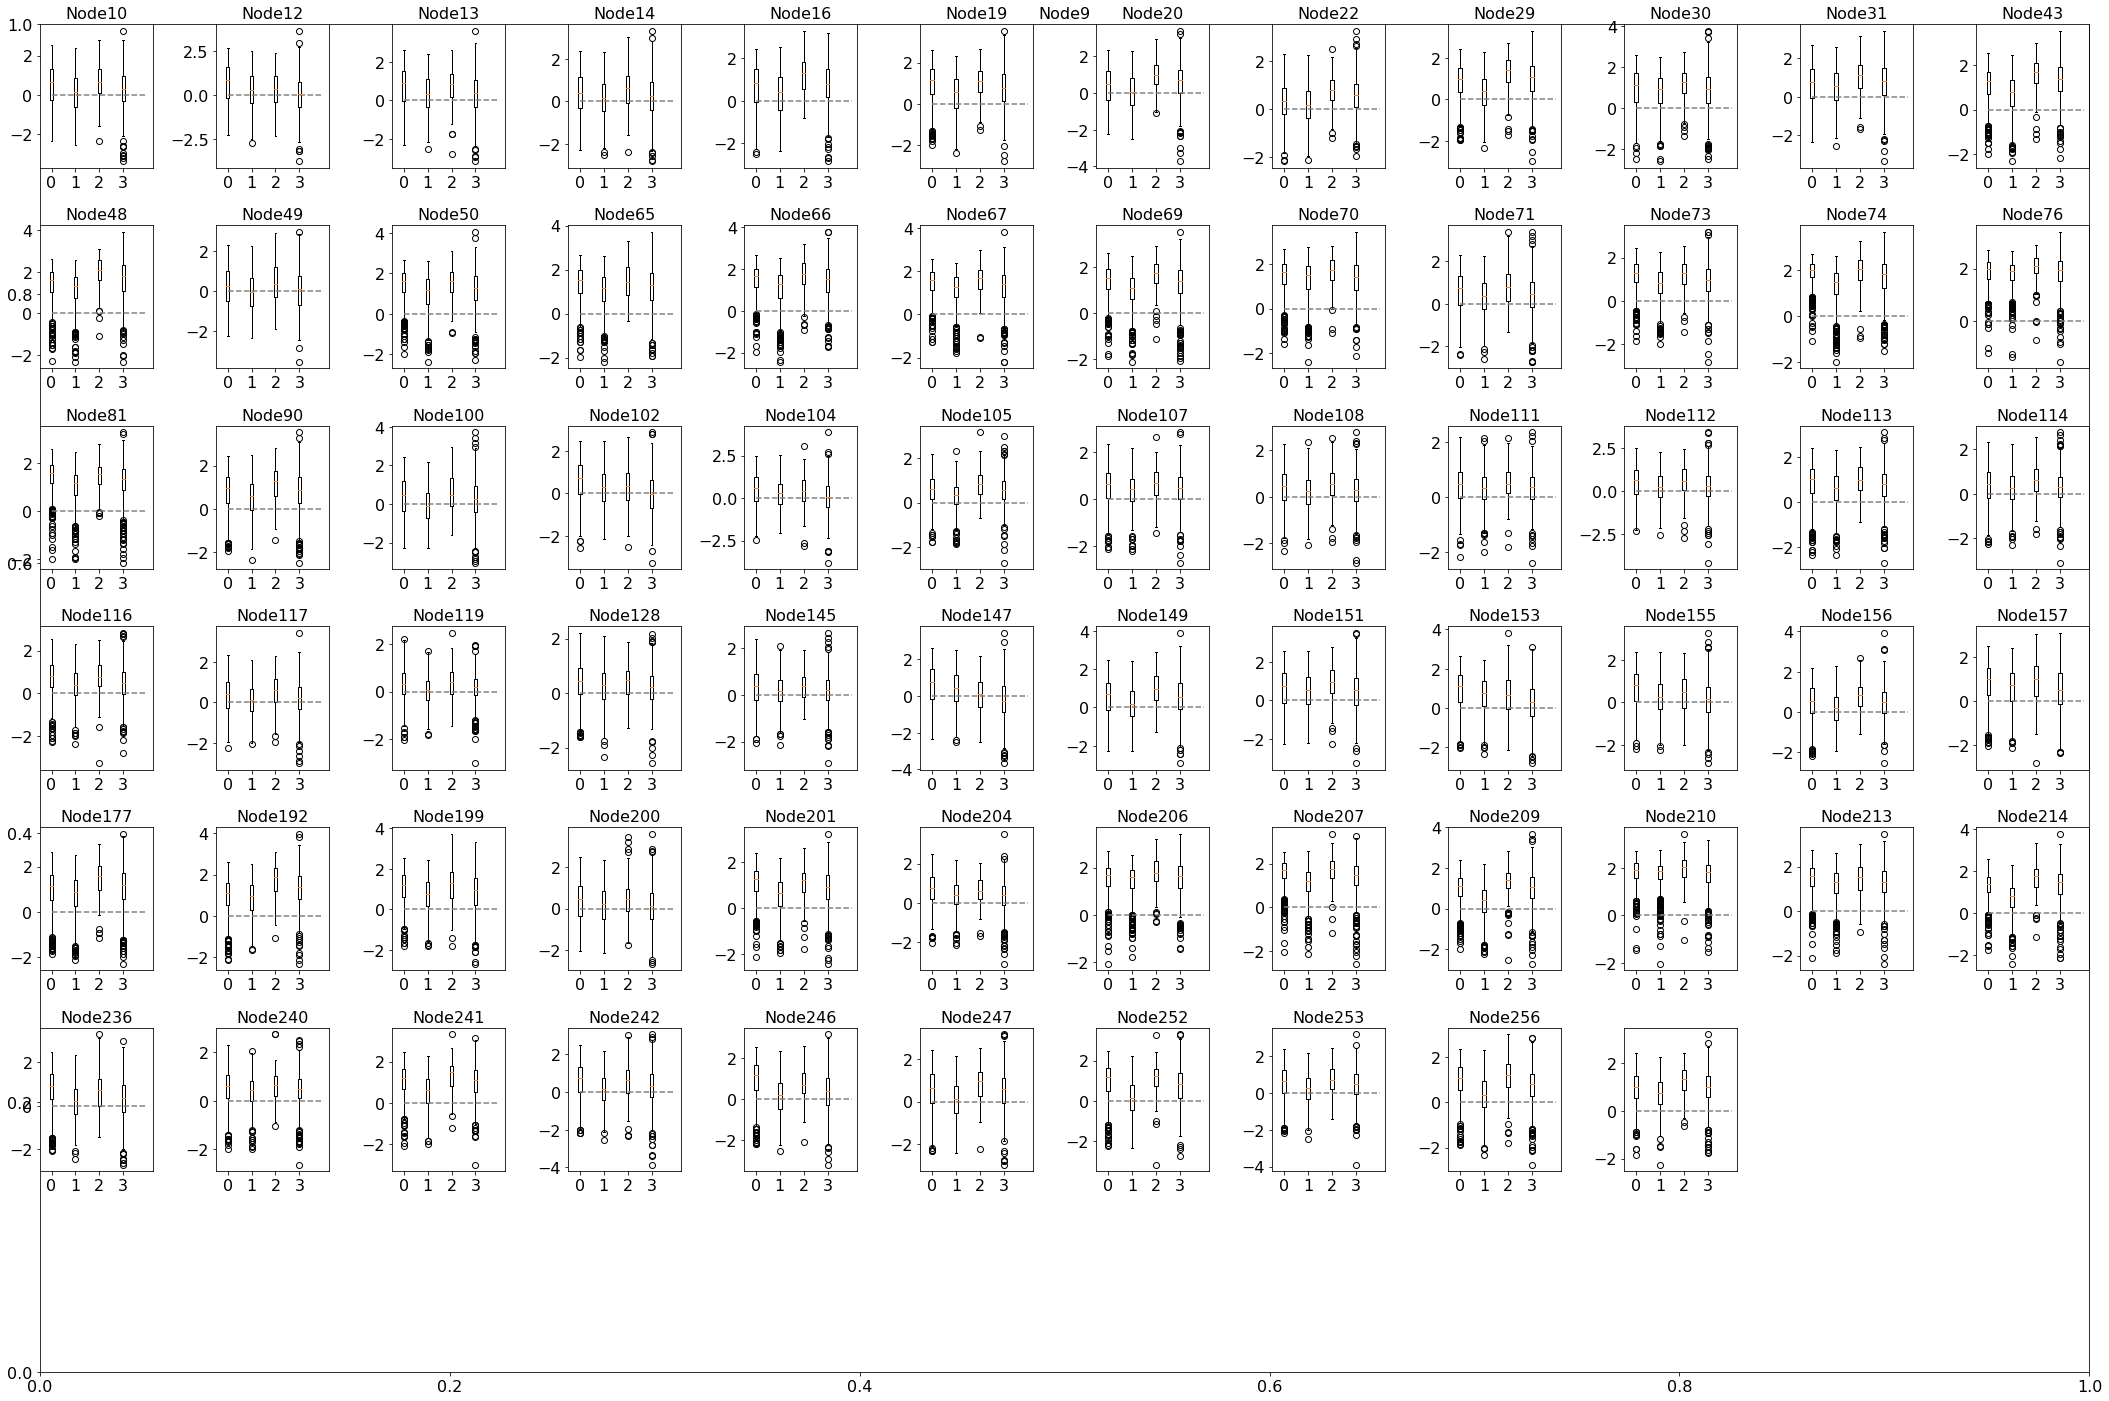

In [51]:
# extra exploratory figure, not in paper
fig = plt.figure(1,figsize=(30,20))
for i,n in enumerate(np.where(nodes_coaxbill_rand_all)[0]):
    plt.title(f'Node{n+1}')
    ax = fig.add_subplot(7,12,i+1)
    plt.boxplot(coef_slope_coax[subs,n],positions=[0])
    plt.boxplot(coef_slope_bill[subs,n],positions=[1])
    plt.boxplot(coef_slope_rand[responses[:,4]==1,n],positions=[2])
    plt.boxplot(coef_slope_rand[responses[:,4]==0,n],positions=[3])
    plt.hlines(0,0,4,color = 'grey',ls='dashed')
plt.tight_layout()

- looks like all are positive reg coeffts, i.e., positive activations
- In the notebook Plot_movie_timecourses.ipynb, we can also double-check this with some timecourse plots for (1) All movies, and (2) Random Mech

# Plot other figures


In [52]:
fig_save_loc = os.path.join('/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/paper_prep/figures/fig3_glm_soc_vs_nonsoc/')

In [54]:
# getting the min and max values of random mech social-nonsocial to use as bounds in brainplots
print('based on raw values of two comparable analyses:')
print(f'RAND: min {min(meanDiff_sl_rand):.2f}, max {max(meanDiff_sl_rand):.2f}')
#print(f'FISHING: min {min(meanDiff_sl_fish) :.2f}, max {max(meanDiff_sl_fish):.2f}')

based on raw values of two comparable analyses:
RAND: min -0.21, max 0.50


- hence for scatterplots, min = -2, max = 4.5 in the function below.
- for the brain maps of rand and fish, we need actual un-normalized values: -.22,.55


In [55]:
def plot_fig(X,Y,xlabel,ylabel):
    # plot of the same brain region across analyses to show how the same region covaries across analyses
    # chucked from the manuscript for keeping things concise
    X = X/np.nanstd(X)
    Y = Y/np.nanstd(Y)
    plt.plot(X,Y,ls='None',marker='.',alpha = .5,color='grey',label = 'mean "social"-"nonsocial"\nper node',markersize=8)
    r,p = stats.pearsonr(X,Y)
    
    plt.xlabel(xlabel+'/std')
    plt.ylabel(ylabel+'/std')
    xymin,xymax =  -2.5,4.5
    
    m, b = np.polyfit(X,Y, 1)
    print(np.poly1d([m,b]))
    xplot = np.linspace(xymin,xymax,10)
    plt.plot(xplot, m*xplot + b,ls='dashed',color = 'k',label = 'line of \nbest fit\n(all nodes)') #plt.title(np.poly1d([m,b]))

    plt.xlim(xymin,xymax)
    plt.ylim(xymin,xymax)
    xpos = xymin#+ .01*(xmax-xmin)
    ypos = xymin+ .8*(xymax-xymin)
    plt.annotate(f'r={r:.2f},\np={p:.1e}', xy=(.05, 0.85), xycoords='axes fraction')
    plt.xticks([-2,0,2,4])
    plt.yticks([-2,0,2,4])
    plt.vlines(0,xymin,xymax,color = 'grey',ls = 'dashed',alpha = .4)
    plt.hlines(0,xymin,xymax,color = 'grey',ls = 'dashed',alpha = .4)

def plot_sig_nodes(X,Y,inds):
    # same as above, but highlighting nodes significant in one or both analyses (I think).
    # also not used in the manuscript
    X = X/np.nanstd(X)
    Y = Y/np.nanstd(Y)
    plt.plot(X[inds],Y[inds],ls='None',marker='o',mfc='w', mec='k',label = 'pair-wise sig.',ms=8)
    plt.plot(X[nodes_coaxbill_rand_all],Y[nodes_coaxbill_rand_all],ls='None',marker='o',
    mfc='k', mec='k',mew = 3, linewidth = 5,label = 'sig. across all\ncomparisons\nexcept FISH',ms=4)

 
0.3926 x + 0.1434
 
0.4229 x + 0.2792
 
0.5533 x + 0.4083


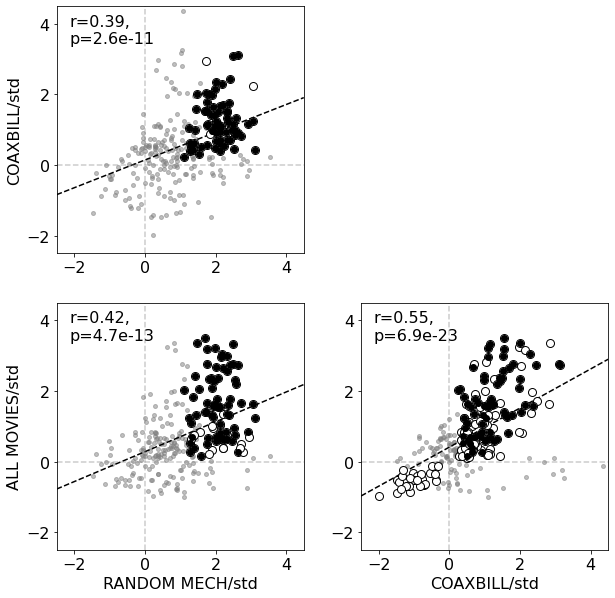

In [57]:
# plotting correlations across analyses using the functions above.
# not used in the final version
dims = [10,10]
fig= plt.figure(1,figsize = dims)

div = [.05,.38,.71]
w,h = .3,.3

ax = fig.add_subplot(221)
X,Y = meanDiff_sl_rand,meanDiff_sl_coaxbill
plot_fig(X,Y,'RANDOM MECH','COAXBILL')
ax.set_aspect('equal')
#signodes
inds =  (pval_slope_rand_corr) & (pval_slope_coaxbill_corr) & (np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_coaxbill)) # & (dirn_coaxbill==dirn_rand)
plot_sig_nodes(X,Y,inds)
plt.xlabel('')

ax = fig.add_subplot(2,2,3)
X,Y = meanDiff_sl_rand,meanDiff_sl_all
plot_fig(X,Y,'RANDOM MECH','ALL MOVIES')
ax.set_aspect('equal')
#signodes
inds =  (pval_slope_rand_corr) & (pval_slope_all_corr) & (np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_all)) 
plot_sig_nodes(X,Y,inds)

ax = fig.add_subplot(2,2,4)
X,Y = meanDiff_sl_coaxbill,meanDiff_sl_all
plot_fig(X,Y,'COAXBILL','ALL MOVIES')
ax.set_aspect('equal')
#signodes
inds =  (pval_slope_coaxbill_corr) & (pval_slope_all_corr) & (np.sign(meanDiff_sl_coaxbill) == np.sign(meanDiff_sl_all)) 
plot_sig_nodes(X,Y,inds)
plt.ylabel('')
plt.savefig(os.path.join(fig_save_loc,'fig2S_scatterplot.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


# Plot brainmaps

- Figure 3 of the manucript

In [58]:
#import plotting functions

from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
from nilearn.plotting import plot_glass_brain
import nibabel as nib
from nilearn.plotting import plot_stat_map

mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')
mask_x = expand_mask(mask)

lbl = [str.upper(x[0:4]) for x in vidnames]
#lbl

In [59]:
shen268_lbl = pd.read_csv(os.path.join(data_file_loc,"shen_dictionary.csv"))
shen268_lbl # identifying what each brain parcel corresponds to - MNI coordinates and region labels

,1,2,3,4,5,6,7,8,9,10,...,259,260,261,262,263,264,265,266,267,268
0,"{'coords': [14.083200000000005, 56.6944, -16.6...","{'coords': [9.599999999999994, 17.618823529411...","{'coords': [5.270633397312864, 35.032629558541...","{'coords': [15.647840531561457, 34.18604651162...","{'coords': [8.283887468030684, 46.058823529411...","{'coords': [14.581460674157299, 64.75280898876...","{'coords': [30.41914191419142, 54.795379537953...","{'coords': [44.469325153374236, 46.09509202453...","{'coords': [28.814814814814817, 51.16316316316...","{'coords': [8.521081081081078, 53.28, 23.88540...",...,"{'coords': [-10.399527186761233, 10.8770685579...","{'coords': [-14.491582491582491, -3.5488215488...","{'coords': [-24.77079107505071, 5.537525354969...","{'coords': [-9.427230046948353, -25.5399061032...","{'coords': [-4.68474576271187, -10.24067796610...","{'coords': [-11.407792207792212, -25.563636363...","{'coords': [-4.821052631578951, -21.5115789473...","{'coords': [-4.227272727272734, -37.8977272727...","{'coords': [-6.9375, -33.13068181818181, -39.3...","{'coords': [-5.697885196374628, -18.9667673716..."


In [63]:
# getting region labels of the 70 intersecting (social processing) parcels
# ROI names reported in the paper come from this + manual evaluation using AAL and Neurosynth
rois = [eval(shen268_lbl[str(n+1)][0])['name'] for n in np.where(nodes_coaxbill_rand_all)[0]]
for i,roi in enumerate(rois):
    print(np.where(nodes_coaxbill_rand_all)[0][i],roi)
print(f'{len(rois)} ROIs sig. at p-value threshold .05\n')

8 100.00% Frontal_Pole
9 48.54% Frontal_Pole; 32.43% Paracingulate_Gyrus; 19.03% Superior_Frontal_Gyrus
11 56.57% Superior_Frontal_Gyrus; 41.14% Frontal_Pole
12 33.82% Middle_Frontal_Gyrus; 33.82% Frontal_Pole; 26.94% Superior_Frontal_Gyrus; 5.42% no_label
13 98.80% Middle_Frontal_Gyrus
15 42.87% Inferior_Frontal_Gyrus_pars_triangularis; 25.98% Inferior_Frontal_Gyrus_pars_opercularis; 12.25% Frontal_Orbital_Cortex; 10.24% Frontal_Pole; 6.02% Frontal_Operculum_Cortex
18 56.48% Frontal_Pole; 27.04% Inferior_Frontal_Gyrus_pars_triangularis; 14.09% Middle_Frontal_Gyrus
19 43.55% Frontal_Operculum_Cortex; 33.40% Insular_Cortex; 10.36% Inferior_Frontal_Gyrus_pars_triangularis; 6.98% Frontal_Orbital_Cortex; 5.71% Inferior_Frontal_Gyrus_pars_opercularis
21 76.55% Middle_Frontal_Gyrus; 21.03% Inferior_Frontal_Gyrus_pars_opercularis
28 80.29% Superior_Frontal_Gyrus; 18.49% Juxtapositional_Lobule_Cortex_(formerly_Supplementary_Motor_Cortex)
29 53.27% Superior_Frontal_Gyrus; 44.39% Middle_Frontal_

In [66]:
def color_rois(values):
    # borrowed from Emily Finn
    # helps color brain regions by ROI
    """
    This function assumes you are passing a vector "values" with the same length as the number of nodes in the atlas.
    """
    shen268 = nib.load(os.path.join(data_file_loc,"shen_2mm_268_parcellation.nii.gz"))
    shen268_data = shen268.get_fdata()
    img = np.zeros(shen268_data.shape)
    #print(shen268_data.shape)
    for roi in range(len(values)):
        itemindex = np.where(shen268_data==roi+1) # find voxels in this node (add 1 to account for zero-indexing)
        #print(len(itemindex[0]))
        img[itemindex] = values[roi] # color them by the desired value 

    affine = shen268.affine
    img_nii = nib.Nifti1Image(img, affine)
    
    return img_nii

cols = ['k','grey','g']
lw = [3,2,1]
len(np.where(pval_slope_rand_unc)[0])

117

In [67]:
from nilearn.surface import vol_to_surf
from nilearn.plotting import plot_glass_brain, plot_surf_roi,plot_stat_map,plot_img,plot_surf_contours
from nilearn import datasets
bg_img = datasets.load_mni152_template()
from nilearn.datasets import fetch_surf_fsaverage
fsaverage = fetch_surf_fsaverage()
#coords = [10*int(i) for i in np.linspace(-4,

destrieux_atlas = datasets.fetch_atlas_surf_destrieux()
parcellation = destrieux_atlas['map_right']
np.unique(parcellation).shape

(75,)

In [69]:
# same movie: rand social v. nonsocial

movie_ind = 4
soc_inds = responses[:,movie_ind]==1 # subs who responded "social"
nonsoc_inds = responses[:,movie_ind]==0 # subs who respoded "nonsocial"

# ttest between slope regs yes vs. no
_,pval_slope_rand_unc1 = stats.ttest_ind(coef_slope_rand[soc_inds,:], coef_slope_rand[nonsoc_inds,:],axis=0, equal_var=False)
meanDiff_sl_rand = np.nanmean(coef_slope_rand[soc_inds,:],axis=0)-np.nanmean(coef_slope_rand[nonsoc_inds,:],axis=0)

pval_slope_rand_unc1[224]

0.02191578373013191

In [76]:
def surf_plot(fig,ax,nodes,params):
    # suface plots as a 2 by 2 grid.
    title_txt = params['title']
    txt  = params['txt']
    vmin = params['vmin']
    vmax = params['vmax']

    #LH  (left hemisphere)
    ax_surf = ax[0,0]     #lateral
    texture = vol_to_surf(color_rois(nodes), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
    surf_plot1=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                                bg_map=fsaverage.sulc_left,axes = ax_surf)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
    texture_contour = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
    plot_surf_contours(fsaverage.infl_left, texture_contour, axes = ax_surf,figure=surf_plot1, legend=True,levels = [1], colors=['k'])
    
    ax_surf = ax[1,0]     #medial
    surf_plot2=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                                bg_map=fsaverage.sulc_left, view = 'medial',axes = ax_surf)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
    plot_surf_contours(fsaverage.infl_left, texture_contour, axes = ax_surf,figure=surf_plot2, legend=True,levels = [1], colors=['k'])
    
    #RH (right hemisphere)
    ax_surf = ax[0,1]     #lateral
    texture = vol_to_surf(color_rois(nodes), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
    surf_plot3=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=True,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                                bg_map=fsaverage.sulc_right,axes = ax_surf)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
    texture_contour = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
    plot_surf_contours(fsaverage.infl_right, texture_contour, axes = ax_surf,figure=surf_plot3, legend=True,levels = [1], colors=['k'])
    surf_plot3.axes[4].text(10,.5*vmax,s=txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
    box = surf_plot3.axes[4].get_position()
    surf_plot3.axes[4].set_position([box.x0*.93, box.y0-.3, box.width, box.height*2])  # move a bit the bar to the right, need to divide by number of columns (to move relative to last figure only, not to overall row, else will get too far away)

    ax_surf = ax[1,1]     #medial
    surf_plot4=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=False,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                                bg_map=fsaverage.sulc_right, view ='medial',axes = ax_surf)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
    plot_surf_contours(fsaverage.infl_right, texture_contour, axes = ax_surf,figure=surf_plot4, legend=True, levels = [1], colors=['k'])#, labels=['Sig. (q<.05) across\n(a),(c),(d)'])
    
    ax[0,0].dist = 7 # change viewing distance to "zoom in" to surface plots
    ax[0,1].dist = 7
    ax[1,0].dist = 7
    ax[1,1].dist = 7

    plt.subplots_adjust(left=0,
                        bottom=0, 
                        right=.8, 
                        top=1, 
                        wspace=0.0, 
                        hspace=-.1)

## BRAIN PLOT FOR RANDOM MECH (FIGURE 3A)

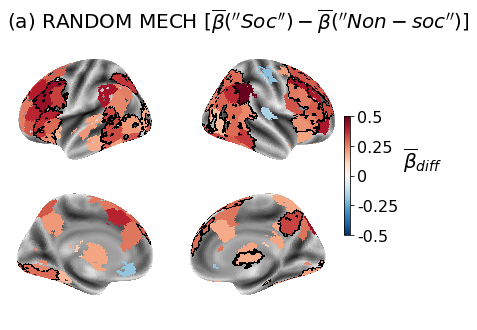

In [77]:
vmin,vmax = -.5,.5
cmap = 'RdBu_r'
#txt = r' $\overline{\beta}(\""")-$' + '\n' + r'$\overline{\beta}_{Non-social}$'+ '\n'
title_txt = '(a) RANDOM MECH ['r"$\overline{\beta}{(''Soc'')}-\overline{\beta}{(''Non-soc'')}$"']'
txt = r"$\overline{\beta}_{diff}$"
#txt = '  'r"$\overline{\beta}{(''Soc'')}-$" + '\n  ' + r"$\overline{\beta}{(''Non}$" + '\n   ' + r"$soc'')$"
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False

nodes = np.zeros((268,))
nodes[pval_slope_rand_unc] = meanDiff_sl_rand[pval_slope_rand_unc]

# surface plot
fig,ax = plt.subplots(nrows=2, ncols= 2,figsize=(6,4),subplot_kw={'projection': '3d'})
ax[0,0].set_title(title_txt,loc='left',fontsize=20)
fig.set_tight_layout(False)
params = {'title':title_txt,'txt':txt, 'vmin': vmin, 'vmax':vmax}
surf_plot(fig,ax,nodes,params)
plt.savefig(os.path.join(fig_save_loc,f'RAND/surf_all4.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

In [80]:
coords = [-44,-34,-24] # which axial slices to plot (subcortical)

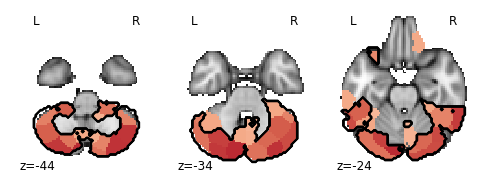

In [81]:
img = roi_to_brain(pd.Series(nodes), mask_x)
ax_plot = plot_img(img.to_nifti(), display_mode = 'z',vmin = vmin, vmax = vmax, cut_coords =coords,cmap = cmap, bg_img = bg_img,colorbar= False,threshold = .0001)
ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles ='-',filled=False)
plt.savefig(os.path.join(fig_save_loc,f'RAND/axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

### BRAIN PLOT FOR COAX-BILL (FIGURE 3B)

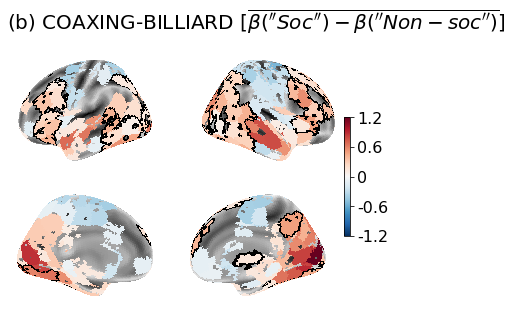

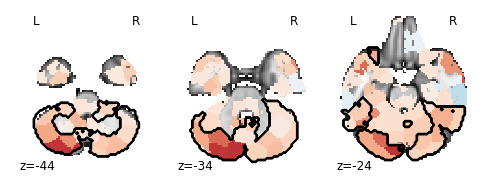

In [82]:
vmin,vmax = -max(meanDiff_sl_coaxbill),max(meanDiff_sl_coaxbill)
cmap = 'RdBu_r'
title_txt = '(b) COAXING-BILLIARD ['r"$\overline{\beta(''Soc'')-\beta(''Non-soc'')}$"']'
txt = '      '

nodes = np.zeros((268,))
nodes[pval_slope_coaxbill_unc] = meanDiff_sl_coaxbill[pval_slope_coaxbill_unc]

fig,ax = plt.subplots(nrows=2, ncols= 2,figsize=(6,4),subplot_kw={'projection': '3d'})
ax[0,0].set_title(title_txt,loc='left',fontsize=20)
fig.set_tight_layout(False)
params = {'title':title_txt,'txt':txt, 'vmin': vmin, 'vmax':vmax}
surf_plot(fig,ax,nodes,params)
plt.savefig(os.path.join(fig_save_loc,f'COAXBILL/surf_all4.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

img = roi_to_brain(pd.Series(nodes), mask_x)
ax_plot = plot_img(img.to_nifti(), display_mode = 'z',vmin = vmin, vmax = vmax, cut_coords =coords,cmap = cmap, bg_img = bg_img,colorbar= False,threshold = .0001)
ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles ='-',filled=False)
plt.savefig(os.path.join(fig_save_loc,f'COAXBILL/axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

### BRAIN PLOT FOR ALL MOVIES SOCIAL V. NONSOCIAL (FIGURE 3C)

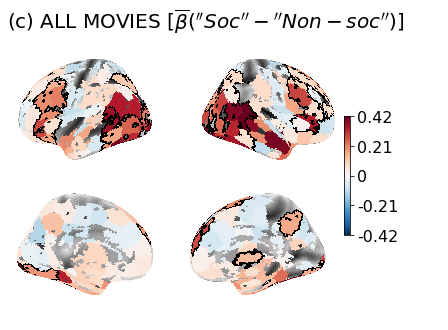

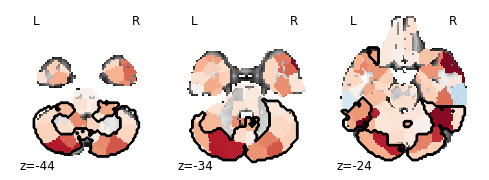

In [84]:
vmin,vmax = -max(meanDiff_sl_all),max(meanDiff_sl_all)
cmap = 'RdBu_r'

title_txt = '(c) ALL MOVIES ['r"$\overline{\beta}(''Soc''-''Non-soc'')$"']'
txt = '      '

nodes = np.zeros((268,))
nodes[pval_slope_all_unc] = meanDiff_sl_all[pval_slope_all_unc]

fig,ax = plt.subplots(nrows=2, ncols= 2,figsize=(6,4),subplot_kw={'projection': '3d'})
ax[0,0].set_title(title_txt,loc='left',fontsize=20)
fig.set_tight_layout(False)
params = {'title':title_txt,'txt':txt, 'vmin': vmin, 'vmax':vmax}
surf_plot(fig,ax,nodes,params)
plt.savefig(os.path.join(fig_save_loc,f'ALL/surf_all4.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

img = roi_to_brain(pd.Series(nodes), mask_x)
ax_plot = plot_img(img.to_nifti(), display_mode = 'z',vmin = vmin, vmax = vmax, cut_coords =coords,cmap = cmap, bg_img = bg_img,colorbar= False,threshold = .0001)
ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles ='-',filled=False)
plt.savefig(os.path.join(fig_save_loc,f'ALL/axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
